In [104]:
#your first ML model
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

In [105]:
# load the california dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [106]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [107]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [108]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

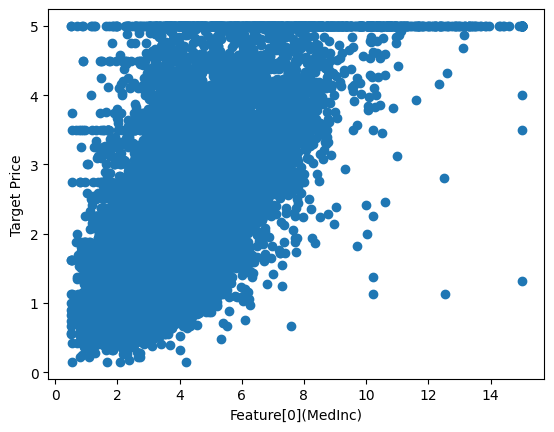

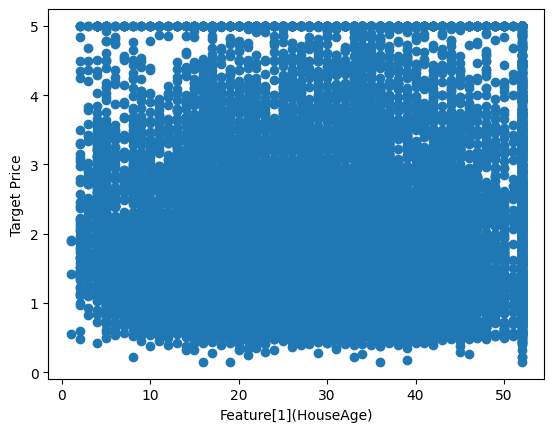

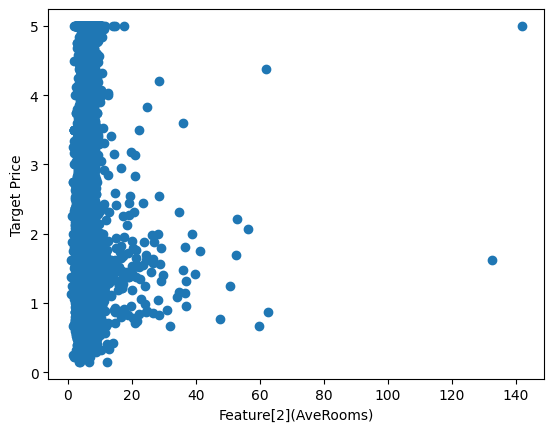

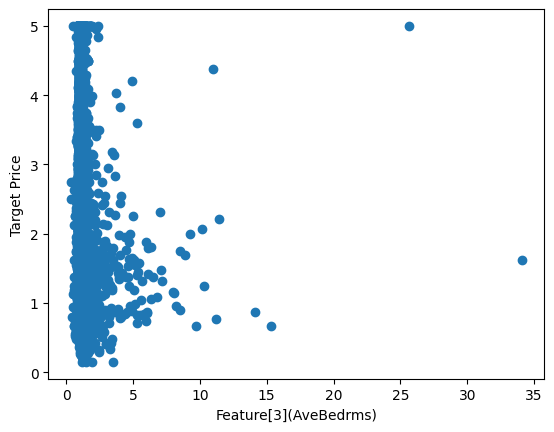

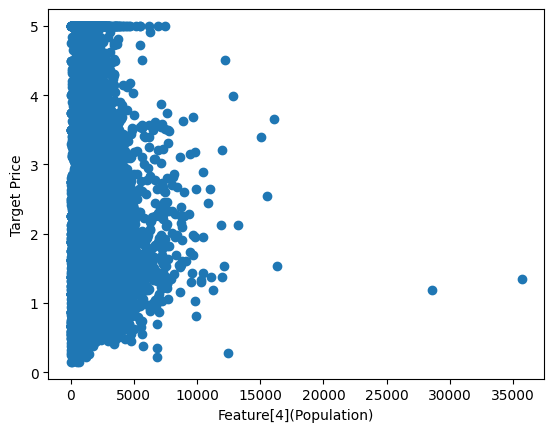

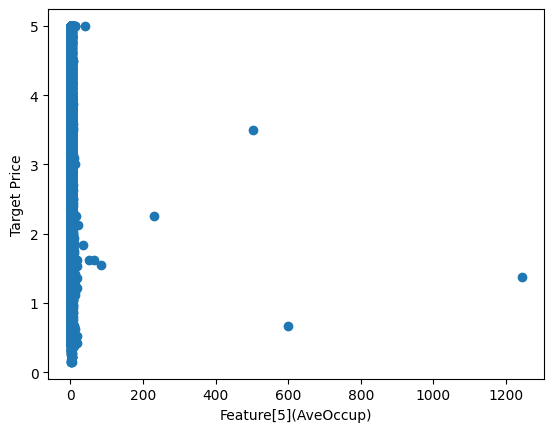

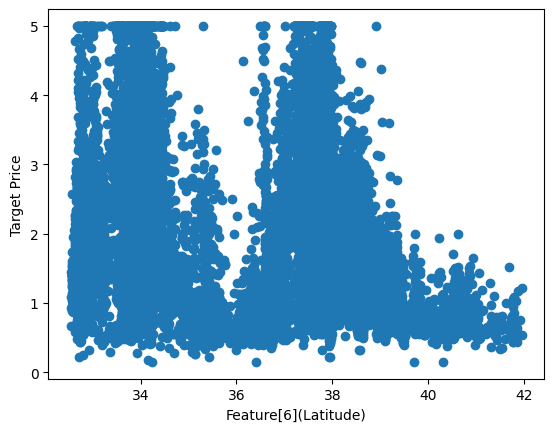

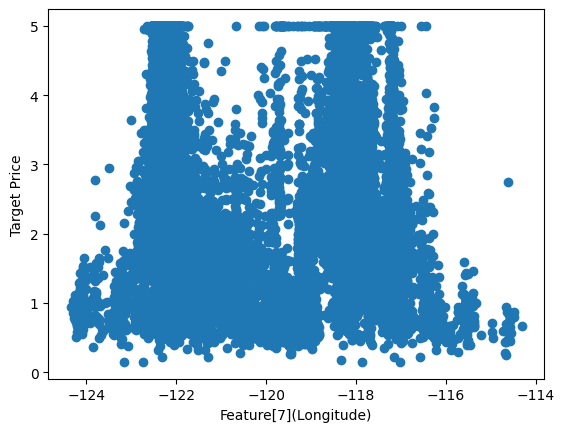

In [109]:
# Visualize the data (every features)
for i in range(housing['data'].shape[1]):
    X = housing['data'][:,[i]]
    y = housing['target']
    fig,ax = plt.subplots()
    ax.scatter(X,y)
    ax.set_xlabel('Feature['+ str(i)+']'+'('+ housing['feature_names'][i]+')')
    ax.set_ylabel('Target Price')

In [110]:
print('Model evaluation and model selection')

Model evaluation and model selection


In [111]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
#Improve your model by transformming the feature(s)
from sklearn.preprocessing import PolynomialFeatures

In [112]:
# Used in the cross-validation below
# to ensure that the random split will be reproducible.
RAND_STATE = 1234

In [113]:
# Prepare te data
X = housing['data'][:,[0]]  # use MedInc as a feature
y = housing['target']

In [114]:
errors_train = OrderedDict()  # Dict of errors measured in training sets
errors_val = OrderedDict()  # Dict of errors measured in validation sets
poly = OrderedDict() # Dict of transformers
models = OrderedDict() # Dict of models

In [ ]:
for deg in range(1,13): # x^1,x^2  .... x^12 ,12 models
    model_name = 'poly' + str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg, include_bias= False)

    # Cross-Validation
    errors_train[model_name] = []     # สร้าง list
    errors_val[model_name] = []
    kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE) # 5 fold CV and shuffle good distribute, random state ตัวเดียวกัน ให้ได้ข้อมูลเดียวกัน
    for train_index, val_index in kf.split(X):
        # Split the data ทั้ง feature เเละ target
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Preprocess the data
        X_train_poly = poly[model_name].fit_transform(X_train)
        X_val_poly = poly[model_name].transform(X_val)
        # Initiate a linear model
        model = linear_model.LinearRegression()
       
        # Train the model
        model.fit(X_train_poly,y_train)

        models[model_name] = model

        # Evaluate on the training set
        y_train_pred = model.predict(X_train_poly)
        mse = mean_squared_error(y_train,y_train_pred)
        errors_train[model_name].append(mse)

        # Evaluate on the validation set
        y_val_pred = model.predict(X_val_poly)
        mse = mean_squared_error(y_val, y_val_pred)
        errors_val[model_name].append(mse)
        # 12 models x 5 cv = 60 รอบ

In [ ]:
#plot training errors ทั้ง 12 โมเดล
bp_train = plt.boxplot(errors_train.values())
plt.xlabel('Degree')
plt.ylabel('MSE') # Mean Square Errors
            
  #เเต่ละโมเดลมีทั้งหมด 5 ค่า สีส้มคือค่า median  จะเห้นว่าถ้า degree เพิ่มขึ้น mse error จะลดลง                      

In [ ]:
# Plot validation error
bp_val = plt.boxplot(errors_val.values(),showfliers=False)

In [ ]:
# Plot the training error mean and the validation error mean
mse_means_train = []
for model_name,errors in errors_train.items():
    mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name,errors in errors_val.items():
    mse_means_val += [np.mean(errors)]

_= plt.plot(mse_means_train,c='g')
_= plt.plot(mse_means_val,c='b')
plt.xlabel('Degree')
plt.ylabel('MSE Average')


In [ ]:
# The 20th degree polynomial model
model_name = 'poly10'

fig,ax = plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train), stop=max(X_train), num=100)
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('MedINC')
ax.set_ylabel('Price')


In [ ]:
model_name = 'poly5'

fig,ax = plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train), stop=max(X_train), num=100)
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('MedINC')
ax.set_ylabel('Price')


In [115]:
from sklearn.linear_model import Ridge


In [119]:
for deg in range(1,10): # x^1,x^2  .... x^12 ,12 models
    model_name = 'poly' + str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg, include_bias= False)

    # Cross-Validation
    errors_train[model_name] = []     # สร้าง list
    errors_val[model_name] = []
    kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE) # 5 fold CV and shuffle good distribute, random state ตัวเดียวกัน ให้ได้ข้อมูลเดียวกัน
    for train_index, val_index in kf.split(X):
        # Split the data ทั้ง feature เเละ target
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Preprocess the data
        X_train_poly = poly[model_name].fit_transform(X_train)
        X_val_poly = poly[model_name].transform(X_val)
        # Initiate a linear model
        model = linear_model.Ridge(alpha=0.001)
       
        # Train the model
        model.fit(X_train_poly,y_train)

        models[model_name] = model

        # Evaluate on the training set
        y_train_pred = model.predict(X_train_poly)
        mse = mean_squared_error(y_train,y_train_pred)
        errors_train[model_name].append(mse)

        # Evaluate on the validation set
        y_val_pred = model.predict(X_val_poly)
        mse = mean_squared_error(y_val, y_val_pred)
        errors_val[model_name].append(mse)
        # 5 models x 5 cv = 25 รอบ

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.2239e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24595e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26725e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19684e-18): result may not be accurate.
  return linalg.solve(A, X

Text(0, 0.5, 'MSE Average')

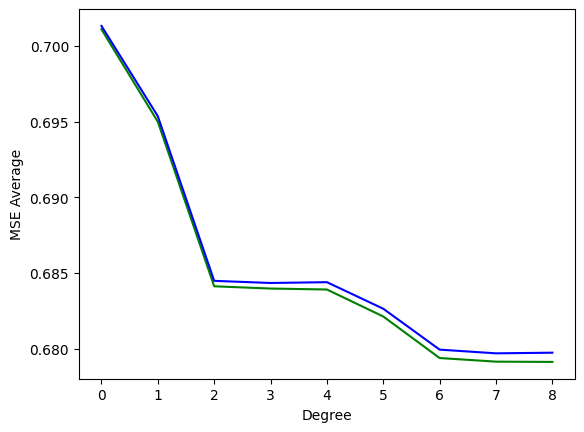

In [120]:
mse_means_train = []
for model_name,errors in errors_train.items():
    mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name,errors in errors_val.items():
    mse_means_val += [np.mean(errors)]

_= plt.plot(mse_means_train,c='g')
_= plt.plot(mse_means_val,c='b')
plt.xlabel('Degree')
plt.ylabel('MSE Average')


In [123]:
# investigate the learned weights of all the models
import pandas as pd
coefs = []
model_names = ['poly'+str(deg) for deg in range(1,10)]
for model_name in model_names:
    coefs += [models[model_name].coef_]

df_coefs = pd.DataFrame(coefs).transpose()
df_coefs.columns = model_names
df_coefs


,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9
0,0.416202,0.526005,0.126949,0.020598,0.124981,-1.174052,-3.897380,-5.226000e+00,-5.209559e+00
1,NaN,-0.010114,0.063682,0.094824,0.051515,0.764074,2.653328,3.787734e+00,3.771028e+00
2,NaN,NaN,-0.003669,-0.007084,0.000625,-0.180181,-0.814892,-1.298937e+00,-1.290252e+00
3,NaN,NaN,NaN,0.000121,-0.000479,0.022337,0.136010,2.510779e-01,2.484823e-01
4,NaN,NaN,NaN,NaN,0.000017,-0.001365,-0.012396,-2.824920e-02,-2.777962e-02
5,NaN,NaN,NaN,NaN,NaN,0.000032,0.000577,1.829376e-03,1.777288e-03
6,NaN,NaN,NaN,NaN,NaN,NaN,-0.000011,-6.319387e-05,-5.974126e-05
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.019823e-07,7.767562e-07
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.908123e-09
